<a href="https://colab.research.google.com/github/BibhuDas123/Statistics-Behind-Data-Science/blob/main/Tweets_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist,word_tokenize
import re,nltk, textblob, string
from string import punctuation
from nltk.tokenize import WhitespaceTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet,stopwords
from sklearn import preprocessing,metrics,pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer,CountVectorizer
from sklearn import decomposition
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#!pip install pipreqs
!pip3 freeze > requirements.txt

In [ ]:
train=pd.read_excel('/content/tweets.xlsx')
train.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,"travel, TTOT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [ ]:
train.isnull().sum()

TweetPostedTime                  0
TweetID                          0
TweetBody                        0
TweetRetweetFlag                 0
TweetSource                      0
TweetInReplyToStatusID       42267
TweetInReplyToUserID         42179
TweetInReplyToScreenName     42179
TweetRetweetCount                0
TweetFavoritesCount              0
TweetHashtags                  100
TweetPlaceID                 41368
TweetPlaceName               41368
TweetPlaceFullName           41368
TweetCountry                 41369
TweetPlaceBoundingBox        41368
TweetPlaceAttributes         42368
TweetPlaceContainedWithin    42368
UserID                           0
UserName                         0
UserScreenName                   0
UserLocation                 16026
UserDescription               4364
UserLink                     25769
UserExpandedLink             25806
UserFollowersCount               0
UserFriendsCount                 0
UserListedCount                  0
UserSignupDate      

In [ ]:
mylist=[col for col in train.columns if train[col].isnull().sum()<100]


In [ ]:
train=train[mylist]
#remove the unneccasry columns
train=train[['TweetBody','TweetRetweetFlag','TweetRetweetCount','TweetFavoritesCount','UserFollowersCount','UserFriendsCount'	,'UserListedCount' ,'UserTweetCount'	]]

In [ ]:
train.head()

,TweetBody,TweetRetweetFlag,TweetRetweetCount,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount
0,RT @BeachyMaldives: Local interaction is a gre...,True,1,0,6334,6144,1917,33556
1,RT @TechTerraEd: Need #giftideas for your kid(...,True,1,0,154,371,180,3201
2,Seven Questions Before Choosing a Cruise Line ...,False,0,0,23433,24762,961,147958
3,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,1,0,11136,10081,978,28988
4,"RT @StylishRentals: Love this! ""Palm Springs M...",True,3065,0,55,21,31,19581


In [ ]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

#Removing the contractions in the sentence
def expand_contractions(text,contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
  expanded_text = contractions_pattern.sub(expand_match, text)
  expanded_text = re.sub("'", "", expanded_text)
  return expanded_text

def expand_match(contraction):

    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contractions_dict.get(match) \
        if contractions_dict.get(match) \
        else contractions_dict.get(match.lower())
    expanded_contraction = expanded_contraction
    return expanded_contraction
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text,contractions_dict):
    #Lower the text
    text=text.lower()
    #Remove contractions
    text=expand_contractions(text,contractions_dict) 
    #Remove and replace “’”, “--”, “-”, “[”, “]”#,% by “” and remove urls
    text = re.sub(r"[http[\w]*:\/\/[\w]*\.?[\w-]+\.+[\w]+[\/\w]+\,+\#+\:\?\!\"\(\)!\'\.\%\[\]]+|--|\d+|\-|\[\]|\'|\n|https?:\/\/.*[\r\n]*", "", text)
    #Remove punctation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #Remove numbers
    text=[word for word in text if not any(c.isdigit() for c in word)]
    #Remove non-alphabets
    text=[word for word in text if word.isalpha()]
    #Remove stop words
    stop=stopwords.words('english')
    text=[x for x in text if x not in stop]
    # pos tag text
    pos_tags = pos_tag(text)
    #lemmatize text
    text=[WordNetLemmatizer().lemmatize(t[0],get_wordnet_pos(t[1])) for t in pos_tags]
    #remove one letter
    text=[t for t in text if len(t)>1]
    #join sentences
    text=' '.join(text)
    return text

In [ ]:
train['TweetBody_cleaned']=train['TweetBody'].apply(lambda x:clean_text(x,contractions_dict))

In [ ]:
train['TweetRetweetFlag'].replace({True:1,False:0},inplace=True)

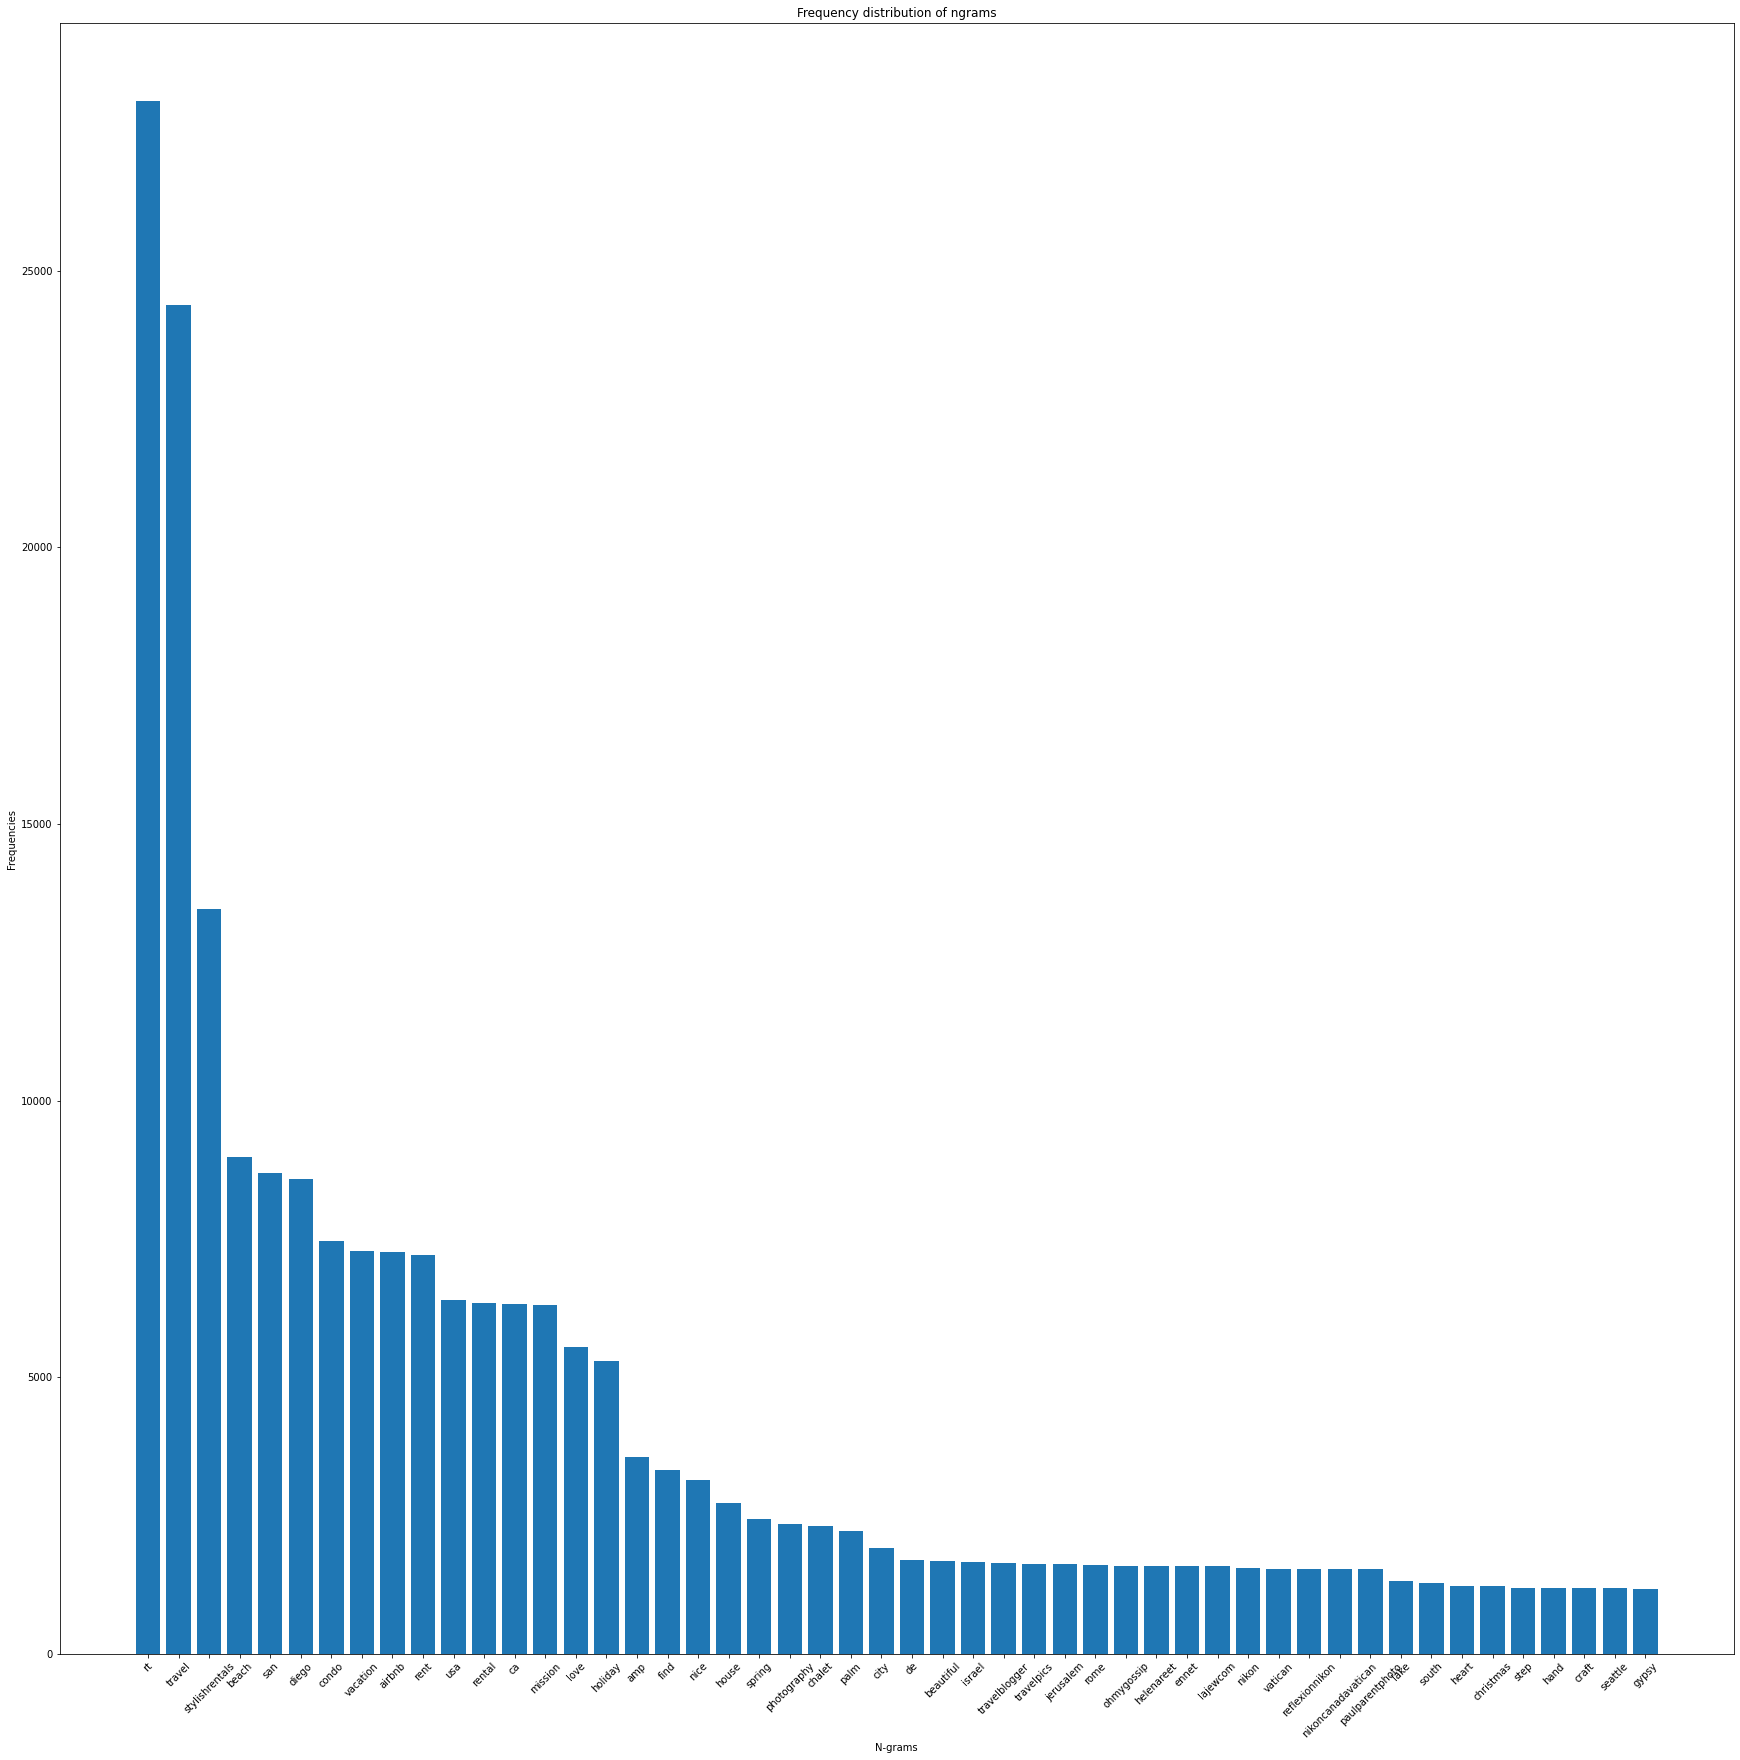

In [ ]:
kwargs = {
    'ngram_range' : (1, 1),
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : 'word'
}

vectorizer = CountVectorizer(**kwargs)
vect_texts = vectorizer.fit_transform(list(train['TweetBody_cleaned']))
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

In [ ]:
vectorizer_tf=TfidfVectorizer(stop_words='english',max_df=0.75,min_df=50,max_features=10000,use_idf=True,norm=None)
tf_vectors=vectorizer_tf.fit_transform(train.TweetBody_cleaned)

In [ ]:
vectorizer_tf.get_feature_names()

['ad',
 'add',
 'addict',
 'adventure',
 'advice',
 'africa',
 'agency',
 'air',
 'airbnb',
 'airline',
 'airport',
 'amaze',
 'amazing',
 'america',
 'amp',
 'amsterdam',
 'anabellhilarski',
 'animal',
 'app',
 'architecture',
 'argentina',
 'art',
 'asia',
 'australia',
 'awesome',
 'baby',
 'bag',
 'bake',
 'bali',
 'bamboo',
 'bar',
 'bay',
 'beach',
 'beautiful',
 'beauty',
 'beautyreview',
 'bebobianchi',
 'bed',
 'berlin',
 'best',
 'big',
 'blog',
 'blogger',
 'blossom',
 'blue',
 'body',
 'bonvoyageurs',
 'book',
 'boy',
 'brand',
 'break',
 'breakfast',
 'breast',
 'bridge',
 'bring',
 'britanniacomms',
 'buche',
 'bucket',
 'budget',
 'building',
 'bundle',
 'business',
 'ca',
 'cafe',
 'cake',
 'california',
 'canada',
 'cancer',
 'car',
 'card',
 'care',
 'caribbean',
 'casserole',
 'cave',
 'celebrate',
 'celeste',
 'center',
 'central',
 'century',
 'chalet',
 'chance',
 'change',
 'chapter',
 'charlesfrize',
 'cheap',
 'check',
 'cheer',
 'cheesetraveller',
 'chicken',


In [ ]:
lda=decomposition.LatentDirichletAllocation(n_components=6,max_iter=3,learning_method='online',learning_offset=50,n_jobs=-1,random_state=0)
W1=lda.fit_transform(tf_vectors)
H1=lda.components_

In [ ]:
#Try to identify the top words about the topics trending
num_words=15
vocab=np.array(vectorizer_tf.get_feature_names())

top_words=lambda t:[vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words=([top_words(t) for t in H1])
topics=[" ".join(t) for t in topic_words]

In [ ]:
topics

['airbnb rent stylishrentals chalet neck lighthouses pocasset wing travel lake rt amp tahoe celeste house',
 'love travel retreat south rt japan heart seattle hand craft gypsy wagon traveller make great',
 'travel city rome lighthouse nikon vatican reflexionnikon nikoncanadavatican paulparentphoto rt holiday christmas new season book',
 'holiday step travel late rt win gift photo tourism check daily enter free amp giveaway',
 'beach san diego condo vacation usa rental ca mission nice stylishrentals rt cozy condominiums hotel',
 'pool desert pioneertown dragonfly travel spring palm best photography rt beautiful love world house israel']